In [1]:
# Simple example to illustrate that principal components are not scale invariant

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
size = 20
np.random.seed(42)
x = [np.random.uniform(-2, 2) for index in range(size)]
y = [np.random.uniform(-5, 5) for index in range(size)]

points = [[x[i], y[i]] for i in range(len(x))]
points = np.asarray(points)

mean = np.mean(points, axis = 0)
covariance_matrix = np.cov(points.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

order = np.argsort(-1 * eigen_values)

print("Principal Eigen Value:", eigen_values[order[0]])
print("Principal Eigen Vector:", eigen_vectors[:, order[0]])
print()

print("Secondary Eigen Value:", eigen_values[order[1]])
print("Secondary Eigen Vector:", eigen_vectors[:, order[1]])

Principal Eigen Value: 9.069725862741496
Principal Eigen Vector: [ 0.26939593 -0.96302951]

Secondary Eigen Value: 0.9235364068391636
Secondary Eigen Vector: [-0.96302951 -0.26939593]


# $Principal\ Components\ of\ the\ raw\ data$

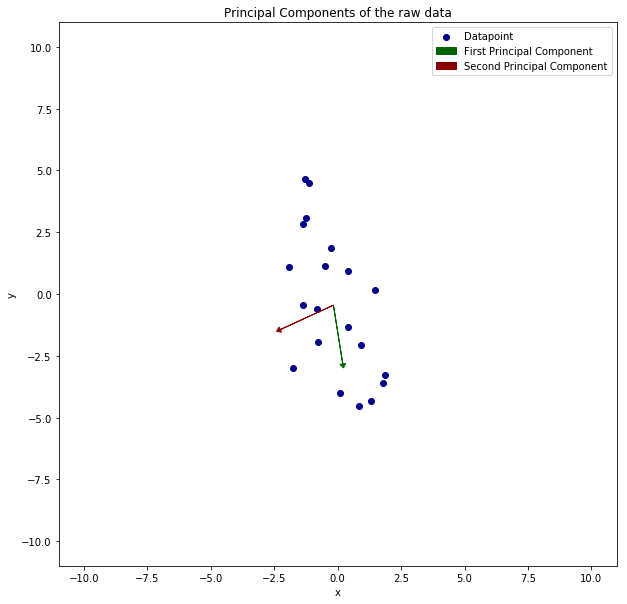

In [4]:
plt.figure(figsize = (10, 10))
fig = plt.subplot(111)
fig.set_title('Principal Components of the raw data')
fig.set_xlabel('x')
fig.set_ylabel('y')

scale = 0.65
length_scale = 2

fig.set_xlim(-11, 11)
fig.set_ylim(-11, 11)
data = fig.scatter(points[:, 0], points[:, 1], color = 'darkblue', label = '')
arrow_a = fig.arrow(mean[0],
                    mean[1],
                    mean[0] + eigen_vectors[:, order[0]][0] * length_scale,
                    mean[1] + eigen_vectors[:, order[0]][1] * length_scale,
                    color = 'darkgreen',
                    head_width = 0.35 * scale,
                    head_length = 0.25 * scale,
                    label = '')
arrow_b = fig.arrow(mean[0],
                    mean[1],
                    mean[0] + eigen_vectors[:, order[1]][0] * length_scale,
                    mean[1] + eigen_vectors[:, order[1]][1] * length_scale,
                    color = 'darkred',
                    head_width = 0.35 * scale,
                    head_length = 0.25 * scale,
                    label = '')

fig.legend([data, arrow_a, arrow_b],
           ['Datapoint', 'First Principal Component', 'Second Principal Component'])
plt.show()

In [5]:
# Scale change
change = 5
new_x = [change * unit for unit in x]

points = [[new_x[i], y[i]] for i in range(len(x))]
points = np.asarray(points)

mean = np.mean(points, axis = 0)
covariance_matrix = np.cov(points.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

order = np.argsort(-1 * eigen_values)

print("Principal Eigen Value:", eigen_values[order[0]])
print("Principal Eigen Vector:", eigen_vectors[:, order[0]])
print()

print("Secondary Eigen Value:", eigen_values[order[1]])
print("Secondary Eigen Vector:", eigen_vectors[:, order[1]])

Principal Eigen Value: 41.27338428038719
Principal Eigen Vector: [ 0.95180951 -0.30668983]

Secondary Eigen Value: 5.0736220086711175
Secondary Eigen Vector: [0.30668983 0.95180951]


# $Principal\ Components\ after\ scaling$

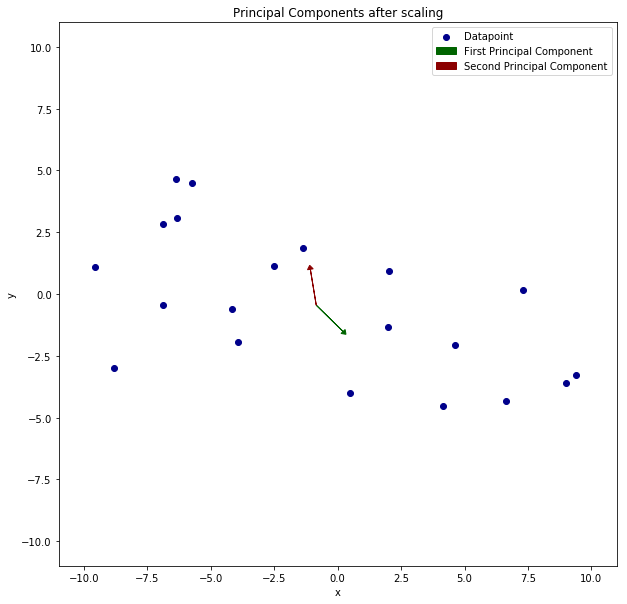

In [6]:
plt.figure(figsize = (10, 10))
fig = plt.subplot(111)
fig.set_title('Principal Components after scaling')
fig.set_xlabel('x')
fig.set_ylabel('y')

scale = 0.65
length_scale = 2

fig.set_xlim(-11, 11)
fig.set_ylim(-11, 11)
data = fig.scatter(points[:, 0], points[:, 1], color = 'darkblue', label = '')
arrow_a = fig.arrow(mean[0],
                    mean[1],
                    mean[0] + eigen_vectors[:, order[0]][0] * length_scale,
                    mean[1] + eigen_vectors[:, order[0]][1] * length_scale,
                    color = 'darkgreen',
                    head_width = 0.35 * scale,
                    head_length = 0.25 * scale,
                    label = '')
arrow_b = fig.arrow(mean[0],
                    mean[1],
                    mean[0] + eigen_vectors[:, order[1]][0] * length_scale,
                    mean[1] + eigen_vectors[:, order[1]][1] * length_scale,
                    color = 'darkred',
                    head_width = 0.35 * scale,
                    head_length = 0.25 * scale,
                    label = '')

fig.legend([data, arrow_a, arrow_b],
           ['Datapoint', 'First Principal Component', 'Second Principal Component'])
plt.show()

In [7]:
# ^_^ Thank You